In [1]:
import pyTigerGraph as tg

conn = tg.TigerGraphConnection("http://3.144.132.94", graphname="KDD_2022_NFT")

In [2]:
import pandas as pd

df = pd.read_csv('../data/Data_API.csv')

/var/folders/6m/4_05ft595_77hxj48by2vf0c0000gp/T/ipykernel_84395/2572697872.py:3: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Data_API.csv')


In [3]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

/opt/anaconda3/envs/kdd2022/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
/opt/anaconda3/envs/kdd2022/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/opt/anaconda3/envs/kdd2022/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
/opt/anaconda3/envs/kdd2022/lib/python3.9/site-packages/torchvision/transforms/functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-0

Using cpu for inference


In [4]:
resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

resnet50.eval().to(device)

Using cache found in /Users/parkererickson/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /Users/parkererickson/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layers): Sequential(
    (0): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d

In [5]:
df.columns

Index(['Smart_contract', 'ID_token', 'Transaction_hash', 'Seller_address',
       'Seller_username', 'Buyer_address', 'Buyer_username', 'Image_url_1',
       'Image_url_2', 'Image_url_3', 'Image_url_4', 'Price_Crypto', 'Crypto',
       'Price_USD', 'Name', 'Description', 'Collection', 'Market',
       'Datetime_updated', 'Datetime_updated_seconds', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

In [7]:
import requests

img = requests.get(uris[0]).content

import io

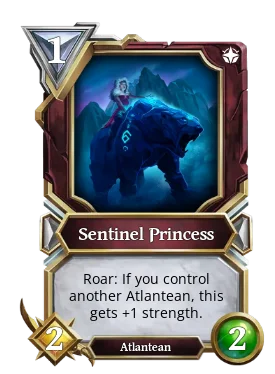

In [8]:
Image.open(io.BytesIO(img))

In [9]:
rs = transforms.Resize((64, 64))
tt = transforms.ToTensor()


In [10]:
tt(rs(Image.open(io.BytesIO(img))))[:3, :, :]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [11]:
def normalize_to_shape(img):
    img = tt(rs(img))
    if img.shape[0] > 3:
        return img[:3, :, :]
    elif img.shape[0] == 3:
        return img
    else:
        return img.unsqueeze(0)


In [16]:
images = [normalize_to_shape(Image.open(io.BytesIO(requests.get(uri).content))) for uri in uris[:500]]
images = torch.stack(images).to(device)

In [17]:
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, 512)

In [ ]:
resnet50.eval()

In [18]:
embeddings = resnet50(images)

In [19]:
embeddings.shape

torch.Size([500, 512])

In [20]:
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

In [25]:
f = open('../data/image_embeddings.txt', 'w')

for batch in chunker(uris, 1000):
    images = [normalize_to_shape(Image.open(io.BytesIO(requests.get(uri).content))) for uri in batch]
    images = torch.stack(images).to(device)
    with torch.no_grad():
        embeddings = resnet50(images)
        embeddings = embeddings.cpu().detach().numpy()
    for i in range(len(batch)):
        f.write(batch[i] + ',' +str(embeddings[i].tolist()) + '\n')

KeyboardInterrupt: 

In [ ]:
f.close()